# Image Classification using MNIST

**Author**: Tianxiang (Adam) Gao <br>
**Course**: CSC 383/483: Applied Deep Learning <br>
**Description**: In this assignment, you will build a simple image classifier for the MNIST handwritten digit dataset using the **Keras deep learning library**. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28×28 pixels.


## Setup

We will first import some useful libraries:

- `numpy` for numerical operations (e.g., arrays, random sampling).
- `keras` for loading the MNIST dataset and building deep learning models.
- `keras.layers` provides the building blocks (dense layers, convolutional layers, activation functions, etc.) to design neural networks.
- `matplotlib` for visualizing images and plotting graphs.


In [2]:
import sys
sys.executable

'/Users/asadkhan/workspace/depaul/.venv/bin/python'

In [3]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

## Prepare the data [10/10]

1. Use `keras.datasets.mnist.load_data()` to load training and testing data. Name them `x_train, y_train, x_test, y_test`. Print the shape of both `x_train` and `x_test` to confirm the number of samples and image dimensions.

2. Convert pixel values from integers in the range 0–255 to floating-point numbers between 0 and 1 (normalize). Use `np.expand_dims(data, -1)` to reshape the arrays so that each image has an explicit channel dimension (since MNIST images are grayscale).

3. Print the first 10 labels from `y_train` to see their raw integer values (0–9). Convert both `y_train` and `y_test` into one-hot encoded vectors using `keras.utils.to_categorical`. Print the first 10 labels again to observe the difference between integer labels and one-hot encoded labels.


In [9]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train shape orignial:", x_train.shape)

# Normalize the pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(f"x_train shape after normalizing: {x_train.shape}")

# Add channel dimension (grayscale → 1 channel)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f"x_train shape after epanding: {x_train.shape}")


print(f"first 10 labels before encoding: {y_train[0:10]}")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"first 10 labels after encoding: {y_train[0:10]}")

x_train shape orignial: (60000, 28, 28)
x_train shape after normalizing: (60000, 28, 28)
x_train shape after epanding: (60000, 28, 28, 1)
first 10 labels before encoding: [5 0 4 1 9 2 1 3 1 4]
first 10 labels after encoding: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Visualize the data [10/10]

4. Randomly pick 9 images from the training set `x_train`. Display them in a 3×3 grid using Matplotlib (`plt.subplot`). For each image, show its corresponding digit label (from `y_train`) as the subplot title.


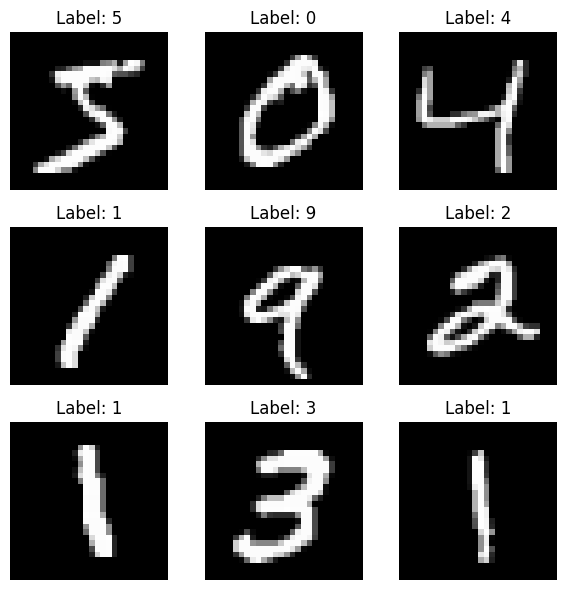

In [15]:
indices = [0, 1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(6, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    # squeeze last channel back to 2D for grayscale display
    plt.imshow(x_train[idx].squeeze(), cmap="gray")
    # plt.imshow(x_train[idx].squeeze(), cmap="binary")

    # show the integer label, not one-hot
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Build the model [50/50]

5. Recall that each MNIST image has shape `(28, 28, 1)` (height, width, and 1 grayscale channel). Assign this shape to a variable `input_shape`.

6. Use `keras.Sequential` to build a simple two-layer MLP with the following layers:
   - Input layer: accepts images of shape `input_shape`.
   - Flatten layer: converts each 2D image into a 1D vector.
   - Dense layer: fully connected layer with 128 hidden units and a `"sigmoid"` activation function.
   - Output layer: fully connected layer with `num_classes` units (one for each digit 0–9) and `"softmax"` activation.

7. Inspect the model: Call `model.summary()` to display the network architecture, output shapes, and number of parameters in each layer.


In [16]:
input_shape = (28, 28,1) # define input shape

model = keras.Sequential([
    # Input
    layers.InputLayer(input_shape=input_shape),
    # Flatten
    layers.Flatten(),
    # Dense with "sigmoid"
    layers.Dense(128, activation="sigmoid"),
    # Dense with "softmax"
    layers.Dense(num_classes, activation="softmax")
])

# summary of the model
model.summary()

/Users/asadkhan/workspace/depaul/.venv/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model [20/20]

8. Set training parameters: Choose a `batch_size` of 128 and train for 20 `epochs`.
   - Batch size controls how many training examples are processed before updating model weights.
   - Epochs represent how many times the model will see the entire training dataset.

9. Compile the model: Use the following components:
   - Loss function: `CategoricalCrossentropy` (since we have multi-class classification with one-hot labels).
   - Optimizer: `SGD` (stochastic gradient descent) with a `learning_rate` of 0.02
   - Metrics: track `CategoricalAccuracy` during training and validation.

10. Train the model
    - Use `model.fit()` with the given batch size and epochs.
    - Set `validation_split=0.1` so that 10% of the training data is held out for validation at the end of each epoch.
    - Observe the training and validation loss/accuracy printed after each epoch.


In [22]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import CategoricalAccuracy

batch_size = 128
epochs = 20

model.compile ( 
    loss = CategoricalCrossentropy(),
    optimizer= SGD(learning_rate=0.2),
    metrics=[
        CategoricalAccuracy()
    ]
)

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8973 - loss: 0.3696 - val_categorical_accuracy: 0.9250 - val_loss: 0.2738
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - categorical_accuracy: 0.9084 - loss: 0.3201 - val_categorical_accuracy: 0.9307 - val_loss: 0.2471
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - categorical_accuracy: 0.9159 - loss: 0.2933 - val_categorical_accuracy: 0.9355 - val_loss: 0.2284
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - categorical_accuracy: 0.9205 - loss: 0.2734 - val_categorical_accuracy: 0.9383 - val_loss: 0.2187
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - categorical_accuracy: 0.9261 - loss: 0.2568 - val_categorical_accuracy: 0.9422 - val_loss: 0.2019
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - categorical_accuracy: 0.9304 - loss: 0.2415 - val_categorical_accuracy: 0.9467 - val_loss: 0.1908
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - categorical_accuracy: 

## Evaluate the trained model on the test set [10/10]

11. After training, use `model.evaluate(x_test, y_test)` to measure how well the model generalizes to unseen data. Store the result in a variable score. Print both the test loss (`score[0]`) and the test accuracy (`score[1]`).


In [23]:
score = model.evaluate(x_test, y_test) # model evaluate
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - categorical_accuracy: 0.9591 - loss: 0.1346
Test loss: 0.13456667959690094
Test accuracy: 0.9591000080108643
